## Title-Predicting Used Car Prices
**Definition:** This project aims to develop a machine learning model that predicts the price of a used car based on various features such as make, model, year, mileage, condition, and other relevant parameters. The model will be trained on a dataset of used car listings and will be evaluated using metrics such as mean absolute error (MAE) and R-squared (R2) to determine its accuracy.

**Problem Definition:** Regression

**Problem Statement:** Given a set of features that describe a used car, such as its make, model, year, mileage, condition, and location, predict the price of the used car.

**Data:**

1. **Sourcing:** Collect data from various sources, such as online marketplaces, dealerships, or government records.
2. **Defining Parameters:** Define the features and target variable for the problem.
3. **Talking to Experts:** Consult with experts in the field of used car sales to gain insights into the data and potential biases.
4. **Evaluation:** Define the evaluation metric (e.g., Mean Absolute Error (MAE) or Root Mean Squared Error (RMSE)) for the regression problem.

**Features:**

1. **Data Dictionary:** Create a data dictionary to document the features and their descriptions.
2. **Feature Exploration:** Explore the data to understand the distribution of features, correlations between variables, and missing values.

**Preparing the Tools:**

1. **Libraries:** Install and import necessary libraries:
	* Pandas for data analysis
	* NumPy for numerical operations
	* Matplotlib/Seaborn for data visualization
	* Scikit-learn for machine learning modeling and evaluation

**Load Data:**

1. **Load Data:** Load the collected data into a Pandas dataframe.
2. **Data Exploration (EDA):** Perform exploratory data analysis to understand the data.

**Data Exploration (EDA):**

* Check what questions are being solved
* Identify the types of data and how to treat them
* Handle missing values
* Compare different columns to each other, compare them to the target variable, and identify correlations between independent variables
* Add, change, or remove features to get more out of the data

**Modelling:**

1. **Features and Labels:** Separate features and labels (target variable).
2. **Training and Test Split:** Split the data into training and testing sets.
3. **Model Choices:** Choose a suitable regression model (e.g., linear regression, decision trees, or random forests).
4. **Model Comparison:** Compare different models using evaluation metrics.
5. **Hyperparameter Tuning and Cross-Validation:** Perform hyperparameter tuning and cross-validation to improve model performance.
6. **Evaluating Your Model:** Evaluate the model using evaluation metrics (e.g., MAE, RMSE).

**Experimentation:**

1. **Iterate and Refine:** Refine the model by trying different models, hyperparameters, or feature engineering techniques.
2. **Evaluate and Repeat:** Repeat the evaluation process until the model meets the desired evaluation metric.

* After trying a few different things, evaluate if you have met the evaluation metric.
* If not, discuss with your team on different options for going forward:
	+ I can improve the current model
    
**Saving the Model:**

1. **Save and Share:** Save the trained model and share it with others for further use or deployment.

This is a general outline of the steps involved in building a machine learning model for predicting used car prices. The specifics may vary depending on the dataset and requirements of the project.

## Import libraries

#### I'll import `datetime` to handle year, `numpy` to work with arrays and `pandas` to read in the dataset files, `matplotlib` & `seaborn` for plotting and `sklearn` for various machine learning models.

In [131]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

## Read dataset

#### I'll read the dataset and get information about it.

In [134]:
#read dataset
dataset = pd.read_csv("Used-car-dataset.csv")
dataset

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65


In [136]:
dataset.head(5)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [138]:
dataset.tail()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65
6018,6018,Chevrolet Beat Diesel,Hyderabad,2011,47000,Diesel,Manual,First,25.44 kmpl,936 CC,57.6 bhp,5.0,NaN,2.50


In [140]:
dataset.shape

(6019, 14)

In [142]:
# Assuming X and y are your dataset and target variable
X = [[1, 2], [3, 4], [5, 6]]  # Define your dataset here
y = [10, 20, 30]  # Define your target variable here

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
linearRegression = LinearRegression()
# Train the model using the training data
linearRegression.fit(X_train, y_train)

LinearRegression()

In [144]:
dataset.info

<bound method DataFrame.info of       Unnamed: 0                              Name    Location  Year  \
0              0            Maruti Wagon R LXI CNG      Mumbai  2010   
1              1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2              2                      Honda Jazz V     Chennai  2011   
3              3                 Maruti Ertiga VDI     Chennai  2012   
4              4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   
...          ...                               ...         ...   ...   
6014        6014                  Maruti Swift VDI       Delhi  2014   
6015        6015          Hyundai Xcent 1.1 CRDi S      Jaipur  2015   
6016        6016             Mahindra Xylo D4 BSIV      Jaipur  2012   
6017        6017                Maruti Wagon R VXI     Kolkata  2013   
6018        6018             Chevrolet Beat Diesel   Hyderabad  2011   

      Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage  \
0                 72000       

In [146]:
dataset.describe

<bound method NDFrame.describe of       Unnamed: 0                              Name    Location  Year  \
0              0            Maruti Wagon R LXI CNG      Mumbai  2010   
1              1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2              2                      Honda Jazz V     Chennai  2011   
3              3                 Maruti Ertiga VDI     Chennai  2012   
4              4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   
...          ...                               ...         ...   ...   
6014        6014                  Maruti Swift VDI       Delhi  2014   
6015        6015          Hyundai Xcent 1.1 CRDi S      Jaipur  2015   
6016        6016             Mahindra Xylo D4 BSIV      Jaipur  2012   
6017        6017                Maruti Wagon R VXI     Kolkata  2013   
6018        6018             Chevrolet Beat Diesel   Hyderabad  2011   

      Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage  \
0                 72000     

In [148]:
dataset.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,0.808840,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [150]:
dataset.loc[dataset["Year"]>30],["Year","Price"]

(      Unnamed: 0                              Name    Location  Year  \
 0              0            Maruti Wagon R LXI CNG      Mumbai  2010   
 1              1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
 2              2                      Honda Jazz V     Chennai  2011   
 3              3                 Maruti Ertiga VDI     Chennai  2012   
 4              4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   
 ...          ...                               ...         ...   ...   
 6014        6014                  Maruti Swift VDI       Delhi  2014   
 6015        6015          Hyundai Xcent 1.1 CRDi S      Jaipur  2015   
 6016        6016             Mahindra Xylo D4 BSIV      Jaipur  2012   
 6017        6017                Maruti Wagon R VXI     Kolkata  2013   
 6018        6018             Chevrolet Beat Diesel   Hyderabad  2011   
 
       Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage  \
 0                 72000       CNG       Manual 

In [152]:
dataset.loc[dataset["Year"]>30,["Year","Price"]]

,Year,Price
0,2010,1.75
1,2015,12.50
2,2011,4.50
3,2012,6.00
4,2013,17.74
...,...,...
6014,2014,4.75
6015,2015,4.00
6016,2012,2.90
6017,2013,2.65


#### Let's first split the dataset into train and test datasets.

In [155]:
X_train, X_test, y_train, y_test = train_test_split(dataset.iloc[:, :-1], 
dataset.iloc[:, -1],  test_size = 0.3, random_state = 42)

In [157]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4213 entries, 4201 to 860
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         4213 non-null   int64  
 1   Name               4213 non-null   object 
 2   Location           4213 non-null   object 
 3   Year               4213 non-null   int64  
 4   Kilometers_Driven  4213 non-null   int64  
 5   Fuel_Type          4213 non-null   object 
 6   Transmission       4213 non-null   object 
 7   Owner_Type         4213 non-null   object 
 8   Mileage            4212 non-null   object 
 9   Engine             4189 non-null   object 
 10  Power              4189 non-null   object 
 11  Seats              4185 non-null   float64
 12  New_Price          580 non-null    object 
dtypes: float64(1), int64(3), object(9)
memory usage: 460.8+ KB


## Exploratory Data Analysis

##### Let's explore the various columns and draw information about how useful each column is. I'll also modify the test data based on training data.

### Index

##### The first column is the index for each data point and hence we can simply remove it.


In [161]:
X_train = X_train.iloc[:, 1:]
X_test = X_test.iloc[:, 1:]

### Name

##### Let's explore the various cars in the dataset.

In [164]:
X_train["Name"].value_counts()

Name
Mahindra XUV500 W8 2WD                35
Maruti Swift VDI                      31
Maruti Ritz VDi                       26
Hyundai i10 Sportz                    25
Maruti Swift Dzire VDI                24
                                      ..
Skoda Laura L and K AT                 1
Honda Amaze S Diesel                   1
Nissan Micra XE                        1
Renault KWID Climber 1.0 MT            1
Ford Endeavour 2.2 Titanium AT 4X2     1
Name: count, Length: 1592, dtype: int64

In [166]:
make_train = X_train["Name"].str.split(" ", expand = True)
make_test = X_test["Name"].str.split(" ", expand = True)

In [168]:
X_train["Manufacturer"] = make_train[0]
X_test["Manufacturer"] = make_test[0]

##### Let's also confirm that there are no null values and identify all unique values.

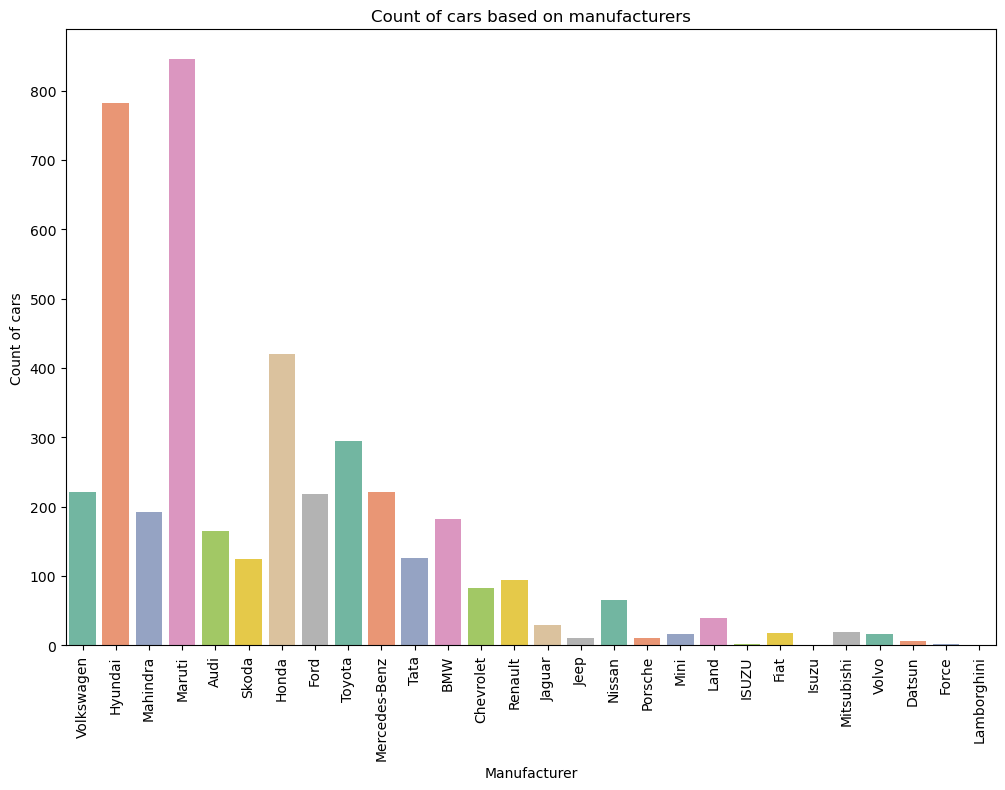

In [171]:

plt.figure(figsize = (12, 8))   #The figure size is set to 12x8 inches.
sns.countplot(x = 'Manufacturer', data = X_train, palette="Set2")  #Specify the color palette as "Set2"
plt.xticks(rotation = 90)      #The x-axis is set to rotate 90 degrees to make the manufacturer names more readable.
plt.title("Count of cars based on manufacturers")
plt.xlabel("Manufacturer")
plt.ylabel("Count of cars")

plt.show()

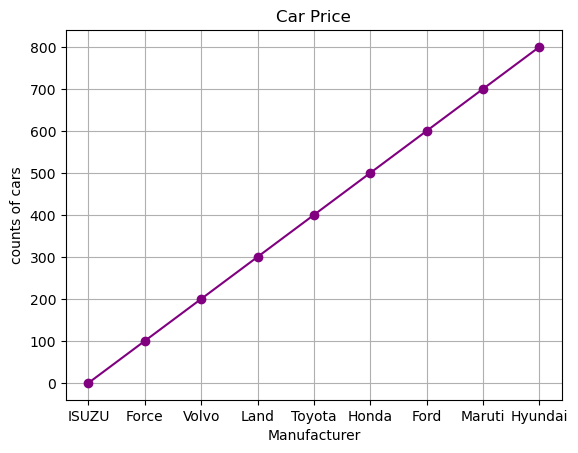

In [173]:
Manufacturer = ["ISUZU", "Force", "Volvo", "Land", "Toyota", "Honda", "Ford", "Maruti", "Hyundai"]
counts_of_cars = [0, 100, 200, 300, 400, 500, 600, 700, 800]

plt.plot(Manufacturer, counts_of_cars, color="purple", marker="o", linestyle="-")
plt.xlabel('Manufacturer')
plt.ylabel('counts of cars')
plt.grid(True)
plt.title("Car Price")
plt.show()

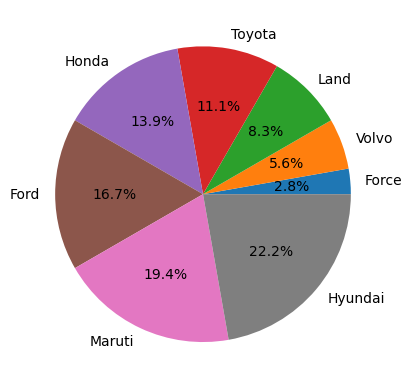

In [175]:
sizes = [100,200,300,400,500,600,700,800]
labels = ["Force", "Volvo", "Land", "Toyota", "Honda", "Ford", "Maruti", "Hyundai"]
plt.pie(sizes, labels=labels, autopct="%1.1f%%")
plt.show()

In [177]:
#Maximum cars in the dataset are by the manufacturer Maruti and there are no null values.

#I'll also drop the Name column.

In [179]:
X_train.drop("Name", axis = 1, inplace = True)
X_test.drop("Name", axis = 1, inplace = True)

### Location

Location should not be a determinant for the price of a car and I'll safely remove it.

In [182]:
X_train.drop("Location", axis = 1, inplace = True)
X_test.drop("Location", axis = 1, inplace = True)

### Year

Year has no significance on its own unless we try to extract how old a car is from this and see how its resale price may get affected.

In [185]:
curr_time = datetime.datetime.now()
X_train['Year'] = X_train['Year'].apply(lambda x : curr_time.year - x)
X_test['Year'] = X_test['Year'].apply(lambda x : curr_time.year - x)

### Kilometers_Driven

##### Kilometers_Driven` is a numerical column with a certain range of values.

In [188]:
X_train["Kilometers_Driven"]

4201     77000
4383     19947
1779     70963
4020    115195
3248     58752
         ...  
3772     27000
5191      9000
5226    140000
5390     76414
860      98000
Name: Kilometers_Driven, Length: 4213, dtype: int64

## Mileage

##### This column defines the mileage of the car. We need to extract the numerical value out of each string and save it.

In [191]:
mileage_train = X_train["Mileage"].str.split(" ", expand = True)
mileage_test = X_test["Mileage"].str.split(" ", expand = True)

X_train["Mileage"] = pd.to_numeric(mileage_train[0], errors = 'coerce')
X_test["Mileage"] = pd.to_numeric(mileage_test[0], errors = 'coerce')

## Let's check for missing values.

In [194]:
print(sum(X_train["Mileage"].isnull()))
print(sum(X_test["Mileage"].isnull()))

1
1


 ##### There is one missing value in each. I'll replace the missing value with the mean value of the column based on the training data.

In [197]:
X_train["Mileage"].fillna(X_train["Mileage"].astype("float64").mean(), inplace = True)
X_test["Mileage"].fillna(X_train["Mileage"].astype("float64").mean(), inplace = True)

### Engine, Power and Seats

##### The `Engine` values are defined in CC so I need to remove `CC` from the data. Similarly, `
Power` has bhp, so I'll remove `bhp` from it. Also, as there are missing values in `Engine`, Power and `Seats`, I'll again replace them with the mean.

In [200]:
 # The result is a pandas Series with multiple values, where each value is a list of words.
cc_train = X_train["Engine"].str.split(" ", expand = True)
 # Do the same for the "Engine" column of the X_test dataframe
cc_test = X_test["Engine"].str.split(" ", expand = True)
 # If a value cannot be converted to a number, it will be replaced with NaN (Not a Number)
X_train["Engine"] = pd.to_numeric(cc_train[0], errors = 'coerce')
 # Do the same for the "Engine" column of X_test.
X_test["Engine"] = pd.to_numeric(cc_test[0], errors = 'coerce')
  # Repeat the same process for the "Power" column.
bhp_train = X_train["Power"].str.split(" ", expand = True)
bhp_test = X_test["Power"].str.split(" ", expand = True)
# Convert the first element of the list of words in the "Power" column of X_train to a numeric value.
X_train["Power"] = pd.to_numeric(bhp_train[0], errors = 'coerce')
# Do the same for the "Power" column of X_test.
X_test["Power"] = pd.to_numeric(bhp_test[0], errors = 'coerce')

In [201]:
X_train["Engine"].fillna(X_train["Engine"].astype("float64").mean(), inplace = True)
X_test["Engine"].fillna(X_train["Engine"].astype("float64").mean(), inplace = True)

X_train["Power"].fillna(X_train["Power"].astype("float64").mean(), inplace = True)
X_test["Power"].fillna(X_train["Power"].astype("float64").mean(), inplace = True)

X_train["Seats"].fillna(X_train["Seats"].astype("float64").mean(), inplace = True)
X_test["Seats"].fillna(X_train["Seats"].astype("float64").mean(), inplace = True)

### New Price

##### As most of the values are missing, I'll drop this column altogether.

In [203]:
X_train.drop(["New_Price"], axis = 1, inplace = True)
X_test.drop(["New_Price"], axis = 1, inplace = True)

## Data Processing

##### Now that we have worked with the training data, let's create dummy columns for categorical columns before we begin training.

In [208]:
X_train = pd.get_dummies(X_train,
columns = ["Manufacturer", "Fuel_Type", "Transmission", "Owner_Type"],
drop_first = True)

In [210]:
X_test = pd.get_dummies(X_test,
columns = ["Manufacturer", "Fuel_Type", "Transmission", "Owner_Type"],
drop_first = True)

##### It might be possible that the dummy column creation would be different in test and train data, thus, I'd fill in all missing columns with zeros.

In [212]:
missing_cols = set(X_train.columns) - set(X_test.columns)
for col in missing_cols:
    X_test[col] = 0
X_test = X_test[X_train.columns]

#### Finally, as the last step of data processing, I'll scale the data.

In [214]:
standardScaler = StandardScaler()
standardScaler.fit(X_train)
X_train = standardScaler.transform(X_train)
X_test = standardScaler.transform(X_test)

## Training and predicting

##### I'll create a **Linear Regression** model and a **Random Forest** model to train on the data and use it for future predictions.

In [218]:
linearRegression = LinearRegression()
linearRegression.fit(X_train, y_train)
y_pred = linearRegression.predict(X_test)
r2_score(y_test, y_pred)

0.7008908549416721

In [220]:
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(f"{r2_score(y_test, y_pred)*100}%")

88.60127900538689%


In [222]:
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
r2_score(y_test, y_pred)

0.8821807589955369

### import picklThe **Random Forest** model performed the best with a R2 score of **0.88**.

## save the model

In [224]:
import pickle

In [225]:
pickle.dump(rf,open("used car price.pkl","wb"))

In [227]:
loaded_model=pickle.load(open("used car price.pkl","rb"))